In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# loading and pre-processing CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# normalisation pixel values entre 0 et 1
train_images = train_images/255.0
test_images = test_images/255.0

In [4]:
# defining class names for cifar-10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

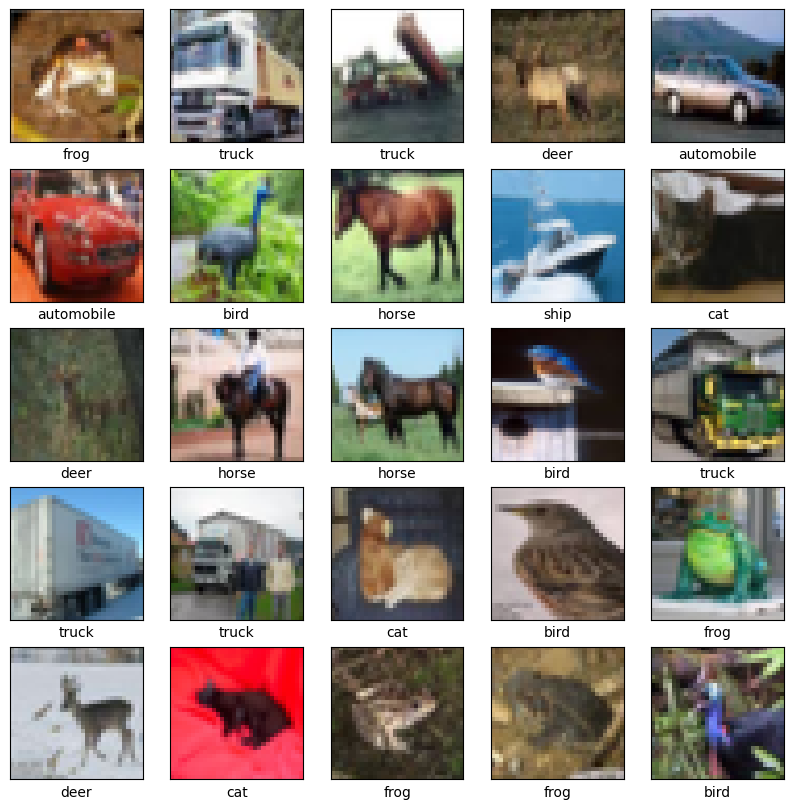

In [5]:
# Visualisation de quelques images
plt.figure(figsize=(10,10))
for i in range(25):  # Affiche 25 images
    plt.subplot(5,5,i+1)
    plt.xticks([])  # Enlever les graduations des axes
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
#Building the CNN model
model = models.Sequential([
    # 1ère couche de convolution et pooling
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    
    # 2ème couche de convolution et pooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # 3ème couche de convolution
    Conv2D(64, (3,3), activation='relu'),
    
    # Aplatissement et couches denses
    Flatten(),
    Dense(64, activation='relu'),  # Couche cachée avec 64 neurones
    Dense(10, activation='softmax')  # Couche de sortie avec 10 classes
])

print("Le modèle CNN a été créé.")

Le modèle CNN a été créé.


c:\Users\tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=13,validation_data=(test_images, test_labels))

Epoch 1/13


c:\Users\tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3515 - loss: 1.7384 - val_accuracy: 0.5574 - val_loss: 1.2308
Epoch 2/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5855 - loss: 1.1643 - val_accuracy: 0.6210 - val_loss: 1.0519
Epoch 3/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6545 - loss: 0.9874 - val_accuracy: 0.6576 - val_loss: 0.9672
Epoch 4/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6888 - loss: 0.8848 - val_accuracy: 0.6366 - val_loss: 1.0381
Epoch 5/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7151 - loss: 0.8097 - val_accuracy: 0.6896 - val_loss: 0.8897
Epoch 6/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7423 - loss: 0.7338 - val_accuracy: 0.6976 - val_loss: 0.8802
Epoch 7/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7595 - loss: 0.6794 - val_accuracy: 0.6862 - val_loss: 0.9178
Epoch 8/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7757 - loss: 0.6368 - val

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.7090 - loss: 0.9282

 Test accuracy is: 0.7089999914169312


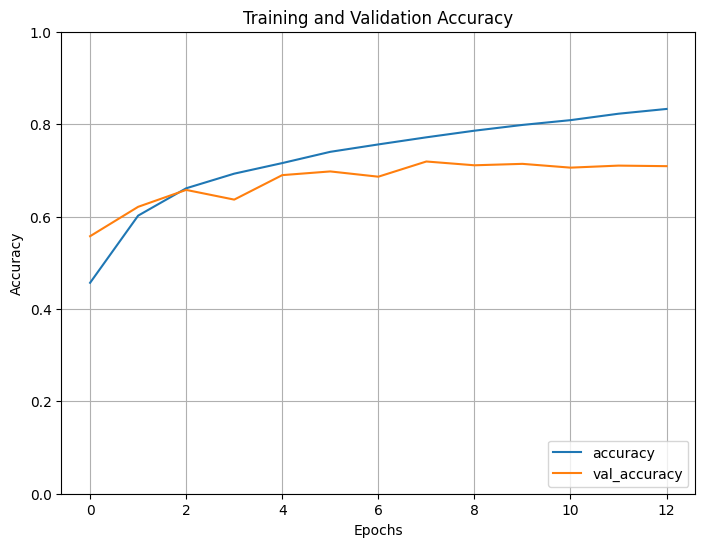

<function matplotlib.pyplot.show(close=None, block=None)>

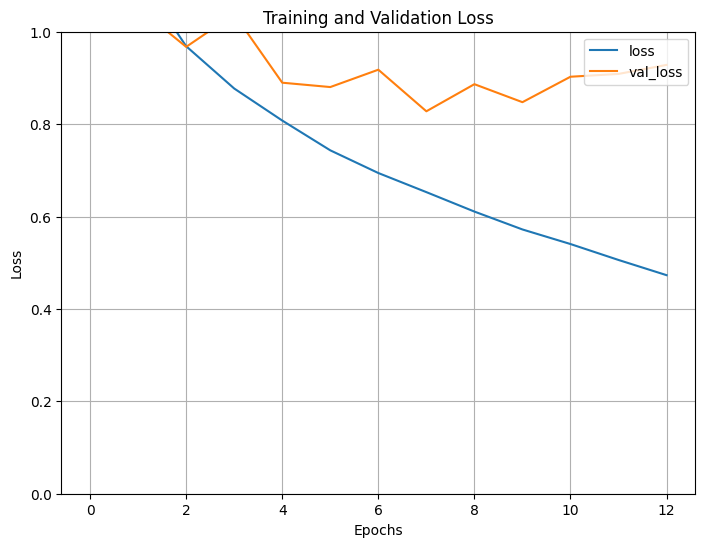

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show

In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


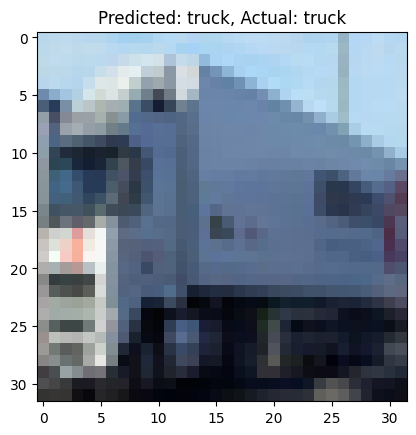

In [43]:
# Predict on random test images
import numpy as np
idx = np.random.randint(0, len(test_images))  # Random index
predicted_class = tf.argmax(model.predict(test_images[idx:idx+1]), axis=1).numpy()[0]
actual_class = test_labels[idx][0]

# Display the image and prediction
plt.imshow(test_images[idx])
plt.title(f"Predicted: {classes[predicted_class]}, Actual: {classes[actual_class]}")
plt.show()
